In [36]:
# import sys
# sys.path.append('/media/arclabdl1/HD1/Linjun/mpc-mpnet')

from mpc.cem_mpc import MPC
from mpc.systems.acrobot_vec import Acrobot

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import pickle
 
def load_data(model, env, traj_id):
    filepath = lambda var: "/media/arclabdl1/HD1/Linjun/data/kinodynamic/{model}/{env}/{var}_{id}.pkl".format(model=model,env=env, var=var, id=traj_id)      
    load_pkl = lambda var: pickle.load(open(filepath(var), "rb"))
    keys = ["control", "path", "start_goal", "time", 'cost']
    return dict(zip(keys, [load_pkl(key) for key in keys]))
 

data = load_data('acrobot_obs', 0, 2)
ref_path = data['path']

n_t = 2
state_dim = 4
control_dim = 1
weights = np.ones(state_dim) * 1
weights[2:] = 0.5
n_sample = 4096
n_elite = 128
t = 2e-1
dt = 2e-2
mu_u = np.zeros((n_t*control_dim))
sigma_u_diag = np.ones(n_t*control_dim)
sigma_u_diag[::control_dim] = 32
sigma_u = np.diag(sigma_u_diag)
params = {
    'n_sample': n_sample,
    'n_elite': n_elite,
    'n_t': n_t,
    'weights': weights,
    'mu_u': mu_u,
    'sigma_u': sigma_u,
    't': t,
    'dt': dt,
    'state_dim': state_dim,
    'control_dim': control_dim,
    'converge_radius': 1e-1,
    'max_it': 30,
    'rolling_count': n_t,
    'final_goal': ref_path[-1],
    'goal_radius': 2,
}

model = Acrobot()
mpc = MPC(params, model, verbose=True)

In [9]:
i = 3
print(data['cost'][i], data['control'][i])

start = ref_path[i]
goal = ref_path[i+1]
# best_x, min_loss, path, collision = mpc.solve(start, goal)
# for n in np.array(path):
#     print(model.get_loss(np.expand_dims(n, axis=0), goal, weights))

1.54 [-3.87317424]


In [10]:
start = ref_path[i]
goal = ref_path[i+1]
best_x, min_loss, path, collision = mpc.solve(start.copy(), goal)


3.276915794990118 inf
3.288223041650534 3.276915794990118
3.2940901858671148 3.276915794990118
3.29520996088022 3.276915794990118
3.293701243916933 3.276915794990118
3.290305302643304 3.276915794990118
3.283191862591148 3.276915794990118
3.283404159697829 3.276915794990118
3.283018056991437 3.276915794990118
3.2828546357671673 3.276915794990118
3.282591490753263 3.276915794990118
3.282533586191816 3.276915794990118
3.282565836078502 3.276915794990118
3.282568965848948 3.276915794990118
3.2825613975109578 3.276915794990118
3.2825428516998336 3.276915794990118
3.282516446730421 3.276915794990118
3.2825077178849087 3.276915794990118
3.2824965668520174 3.276915794990118
3.28249725370524 3.276915794990118
3.282495590038944 3.276915794990118
3.282492786351108 3.276915794990118
3.282491584565346 3.276915794990118
3.2824906243531644 3.276915794990118
3.2824873841653304 3.276915794990118
3.2824857000291265 3.276915794990118
3.2824839137965665 3.276915794990118
3.2824841464135135 3.2769157949901

[-0.89120884  1.50734784 -0.36267027  2.50518148] [ 1.05585886 -2.64572119 -3.89214283  0.58986767]


<IPython.core.display.Javascript object>


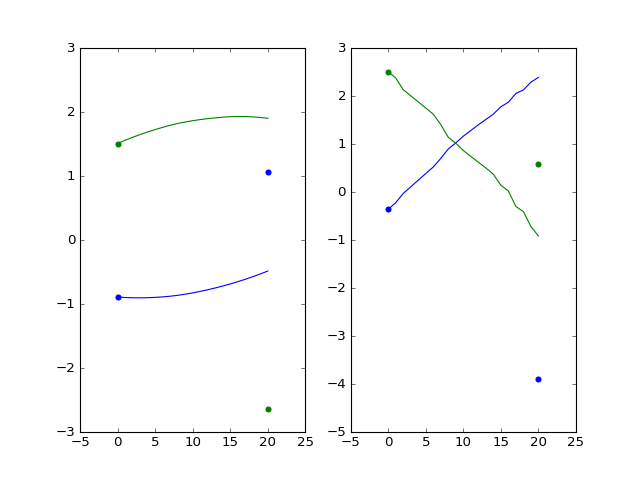

In [11]:
%matplotlib notebook
print(ref_path[i], ref_path[i+1])
plt.subplot(1,2,1)
plt.scatter(0, ref_path[i,0], color='blue')
plt.scatter(0, ref_path[i,1], color='green')
plt.plot(np.arange(len(path)), np.array(path)[:,0])
plt.plot(np.arange(len(path)), np.array(path)[:,1])
plt.scatter(len(path)-1, ref_path[i+1,0], color='blue')
plt.scatter(len(path)-1, ref_path[i+1,1], color='green')

plt.subplot(1,2,2)
plt.scatter(0, ref_path[i,2], color='blue')
plt.scatter(0, ref_path[i,3], color='green')
plt.plot(np.arange(len(path)), np.array(path)[:,2])
plt.plot(np.arange(len(path)), np.array(path)[:,3])
plt.scatter(len(path)-1, ref_path[i+1, 2], color='blue')
plt.scatter(len(path)-1, ref_path[i+1, 3], color='green')


In [43]:
mpnet_path = np.load('mpnet/mpnet_path.npy')

node = 6

x = mpnet_path[node].copy()
for i in [node]:#range(len(mpnet_path)-1):#
    print("node number {}".format(i))
    x, min_loss, path, collision = mpc.rolling(x.copy(), mpnet_path[i+1])

node number 6
0.055676352232694626 inf
loss 0.12570241 count 0 u: [1.89798458]
min_loss: 0.12570241
0.05510246381163597 inf
loss 0.055102464 count 0 u: [1.6834422]
min_loss: 0.055102464
converged
min_loss: 0.055102464


[-0.12953281  0.76074976  0.43625376 -0.01724632] [ 0.05472743  0.71271217  0.40845644 -0.1571984 ]


<IPython.core.display.Javascript object>


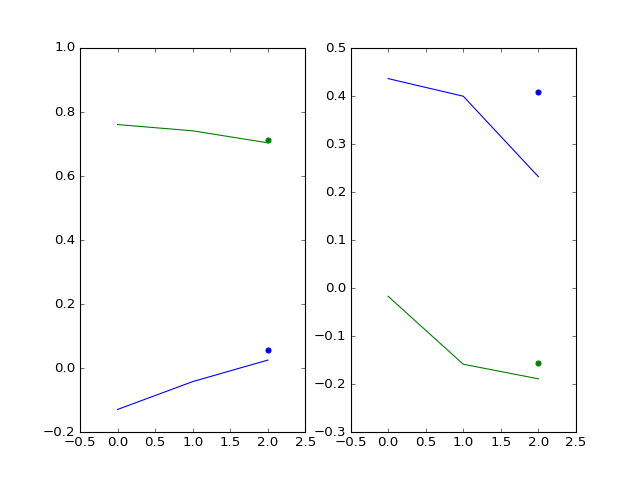

In [44]:
%matplotlib notebook
path = [list(mpnet_path[node])] + path
print(mpnet_path[node], mpnet_path[node+1])
plt.subplot(1,2,1)
plt.plot(np.arange(len(path)), np.array(path)[:,0])
plt.plot(np.arange(len(path)), np.array(path)[:,1])
plt.scatter(len(path)-1, mpnet_path[node+1,0], color='blue')
plt.scatter(len(path)-1, mpnet_path[node+1,1], color='green')

plt.subplot(1,2,2)
plt.plot(np.arange(len(path)), np.array(path)[:,2])
plt.plot(np.arange(len(path)), np.array(path)[:,3])
plt.scatter(len(path)-1, mpnet_path[node+1, 2], color='blue')
plt.scatter(len(path)-1, mpnet_path[node+1, 3], color='green')


In [69]:
x,mpnet_path[-1]
print(model.get_loss(np.expand_dims(x, axis=0), mpnet_path[-1], weights))
print(model.get_distance(np.expand_dims(x, axis=0), mpnet_path[-1], weights))

[0.25964668]
[2.1673937]
